In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [2]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [3]:
jpeg_map = pd.read_csv("../measurements/jpeg_snr_cha/map.csv")
decom_map= pd.read_csv("../measurements/decomposition_snr_cha/map.csv")
reg_map = pd.read_csv("../measurements/regression_snr_cha/map.csv")
jpeg_cha = pd.read_csv("../measurements/jpeg_snr_cha/characteristic.csv")
decom_cha= pd.read_csv("../measurements/decomposition_snr_cha/characteristic.csv")
reg_cha = pd.read_csv("../measurements/regression_snr_cha/characteristic.csv")

In [4]:
local_map = pd.read_csv("../../dynamic_framework/measurements/local/map.csv")

In [5]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [60,70,80,90,100]

snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group =jpeg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_jpeg = snr[np.isnan(snr) ==False]
map_diff_jpeg = map_diff[np.isnan(snr) ==False]
sens_diff_jpeg = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Per-frame mAP drop  [%]')

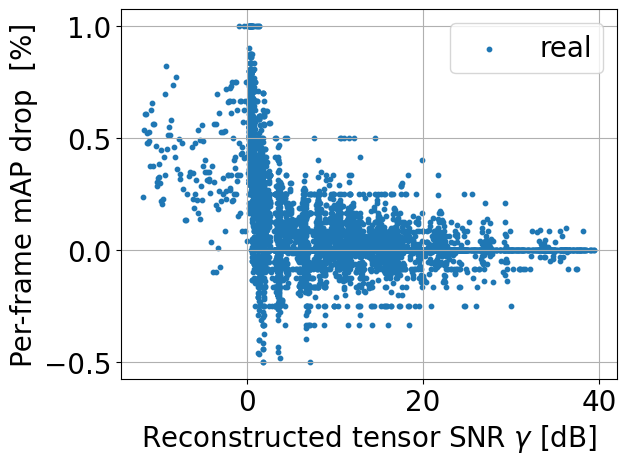

In [6]:

# plt.figure(figsize=(4,3))
plt.figure()
plt.scatter(snr_cleaned_jpeg, map_diff_jpeg, s=10,label="real")
# plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
# plt.plot(gaussian_x,log_norm_values*(75/lap0)+25,color="tab:orange",label="estimation" )
plt.legend()
plt.grid()
# plt.xlim([0, 40])
# plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./map_drop.pdf")

In [7]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [1,2,3,4,5]
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group =reg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_reg = snr[np.isnan(snr) ==False]
map_diff_reg = map_diff[np.isnan(snr) ==False]
sens_diff_reg = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Per-frame mAP drop  [%]')

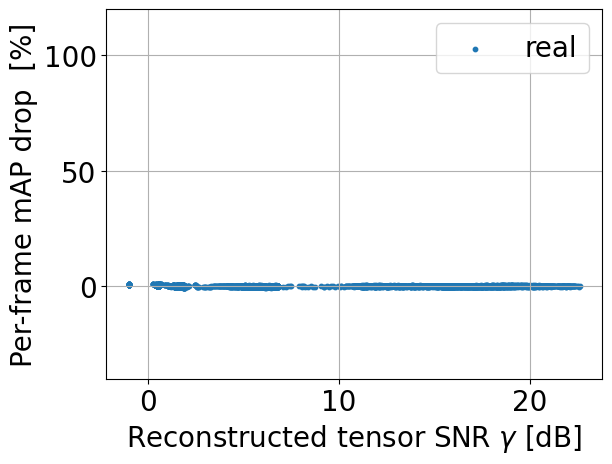

In [ ]:

# plt.figure(figsize=(4,3))
plt.figure()
plt.scatter(snr_cleaned_reg, map_diff_reg, s=10,label="real")
# plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
# plt.plot(gaussian_x,log_norm_values*(75/lap0)+25,color="tab:orange",label="estimation" )
plt.legend()
plt.grid()
# plt.xlim([0, 40])
# plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./map_drop.pdf")

In [9]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [2,4,6,8,10]
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        # map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        # sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_decom = snr[np.isnan(snr) ==False]
map_diff_decom = map_diff[np.isnan(snr) ==False]
sens_diff_decom = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Per-frame mAP drop  [%]')

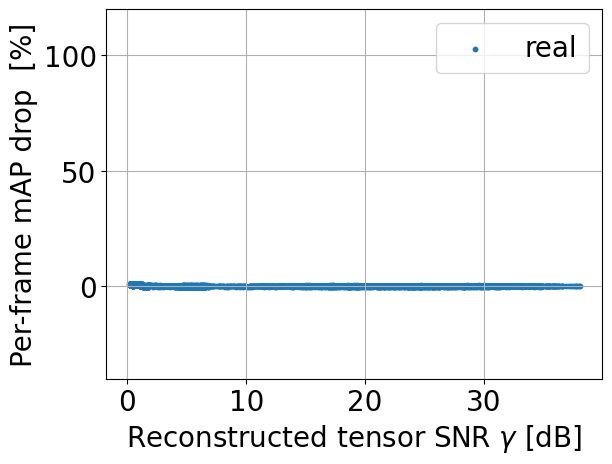

In [ ]:

# plt.figure(figsize=(4,3))
plt.figure()
plt.scatter(snr_cleaned_decom, map_diff_decom, s=10,label="real")
# plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
# plt.plot(gaussian_x,log_norm_values*(75/lap0)+25,color="tab:orange",label="estimation" )
plt.legend()
plt.grid()
# plt.xlim([0, 40])
# plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./map_drop.pdf")

Text(0, 0.5, 'Per-frame mAP drop  [%]')

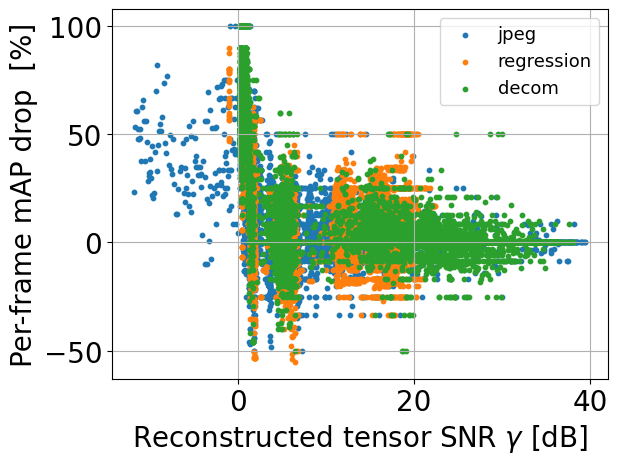

In [11]:
plt.figure()

plt.scatter(snr_cleaned_jpeg, map_diff_jpeg*100,s =10,label="jpeg" )
plt.scatter(snr_cleaned_reg, map_diff_reg*100,s=10,label="regression" )
plt.scatter(snr_cleaned_decom, map_diff_decom*100, s=10,label="decom" )

# plt.scatter( map_diff_jpeg,snr_cleaned_jpeg/100,s =10,label="jpeg" )
# plt.scatter( map_diff_reg,  snr_cleaned_reg/100,s=10,label="regression" )
# plt.scatter(map_diff_decom, snr_cleaned_decom/100, s=10,label="decom" )
# plt.ylim([-40,120])
# plt.xlim([0,50])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")

## Define fitting functions

In [39]:
    
def fitting_fun(x, a, k):
    # Ensure a and k are positive
    if a <= 0 or k <= 0:
        return np.full_like(x, np.nan)  # Return NaNs if parameters are invalid

    # Scale `a` properly
    # a = a / 100  

    # Compute thresholds
    thresh = np.exp(1 / (-2 * a * a * k * k)) / np.sqrt(2 * np.pi * a * a)
    thresh2 = 1 / np.sqrt(2 * np.pi * a * a)
    # print(thresh)
    # print(thresh2)
    # Ensure x is strictly positive to avoid log(0) issues
    x = np.maximum(x, 1e-10)  

    # Compute the function safely
    def second_piece(x):
        log_term = np.log(np.sqrt(2 * np.pi * a * a) * x)
        log_term[log_term > 0] = 0  # Ensure log_term is never positive
        sqrt_term = np.sqrt(np.maximum(-2 * a * a * log_term, 0))  # Prevent negative sqrt
        return k * sqrt_term

    # Use correct conditions in np.piecewise
    return np.piecewise(
        x, 
        [x < thresh, (x >= thresh) & (x < thresh2), x >= thresh2], 
        [1, second_piece, 0]
    )


In [40]:
def keep_top_10_percent(group):
    top_n = max(1, int(len(group) * 0.01))  # Ensure at least one value is kept
    return group.nlargest(top_n, 'y')

def get_fitting_params(snrs, drops):
    snrs = snrs[drops >=0]
    drops = drops[drops >=0]

    drops = drops[snrs>=0]
    snrs = snrs[snrs>=0]

    # Create DataFrame
    df = pd.DataFrame({'x': snrs, 'y': drops})
    # Number of bins
    n_bins = 50

    # Sort by x values
    df = df.sort_values(by='x')

    # Define bin edges
    df['bin'] = pd.qcut(df['x'], n_bins, labels=False)  # Equal count bins

    df_top_10 = df.groupby('bin', group_keys=False).apply(keep_top_10_percent)
    params, _ = curve_fit(fitting_fun, df_top_10['x'].to_numpy(), df_top_10['y'].to_numpy(),p0=[0.03, 20], method="trf")
    return params
    

## mAP fitting

In [41]:
snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg,snr_cleaned_decom ))
map_drop= np.concatenate((map_diff_jpeg,map_diff_reg,map_diff_decom))
param_map = get_fitting_params(snrs,map_drop)

/tmp/ipykernel_3137363/1157434385.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_10 = df.groupby('bin', group_keys=False).apply(keep_top_10_percent)


In [42]:
test_x = np.arange(0,40,0.1)

test_y = []
for x in test_x:
    test_y.append(fitting_fun(x,param_map[0], param_map[1])*100)

Text(0, 0.5, 'Per-frame mAP drop  [%]')

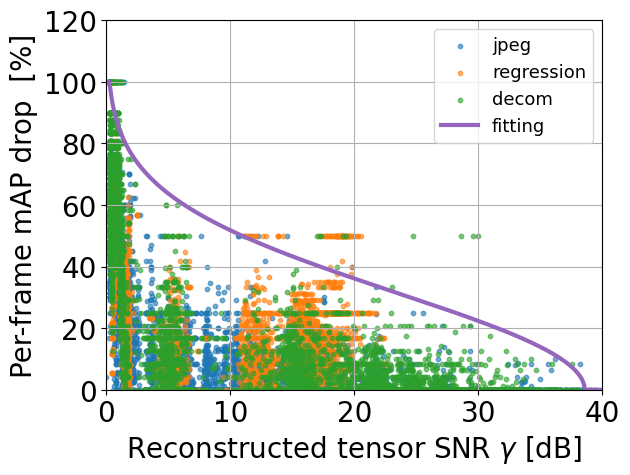

In [43]:
plt.figure()

plt.scatter(snr_cleaned_jpeg, map_diff_jpeg*100,s =10,color="tab:blue", alpha=0.6,label="jpeg" )
plt.scatter(snr_cleaned_reg, map_diff_reg*100,s=10,color="tab:orange",  alpha=0.6,label="regression" )
plt.scatter(snr_cleaned_decom, map_diff_decom*100,color="tab:green", alpha=0.6, s=10,label="decom" )
plt.plot(test_x, test_y, color="tab:purple",linewidth=3.0 ,label="fitting")

# plt.scatter( map_diff_jpeg,snr_cleaned_jpeg/100,s =10,label="jpeg" )
# plt.scatter( map_diff_reg,  snr_cleaned_reg/100,s=10,label="regression" )
# plt.scatter(map_diff_decom, snr_cleaned_decom/100, s=10,label="decom" )
plt.ylim([0,120])
plt.xlim([0,40])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")

## Sensitivity fitting

In [44]:
snrs = np.concatenate((snr_cleaned_jpeg,snr_cleaned_reg,snr_cleaned_decom ))
sem_drop= np.concatenate((sens_diff_jpeg,sens_diff_reg,sens_diff_decom))
param_map = get_fitting_params(snrs,sem_drop)

/tmp/ipykernel_3137363/1157434385.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_10 = df.groupby('bin', group_keys=False).apply(keep_top_10_percent)


In [45]:
test_x = np.arange(0,40,0.1)

test_y = []
for x in test_x:
    test_y.append(fitting_fun(x,param_map[0], param_map[1])*100)

Text(0, 0.5, 'Per-frame mAP drop  [%]')

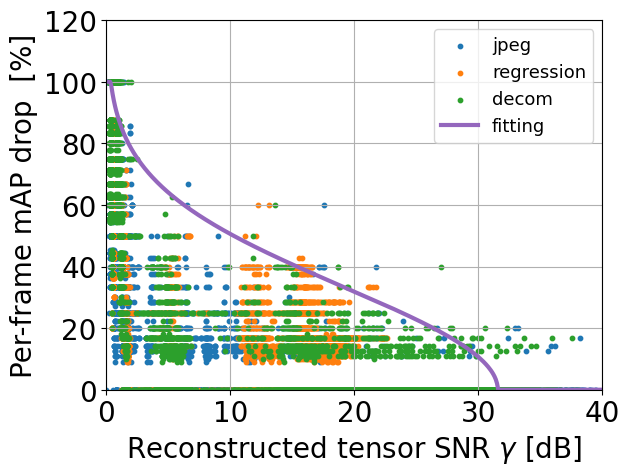

In [ ]:
plt.figure()

plt.scatter(snr_cleaned_jpeg, sens_diff_jpeg*100,s =10,label="jpeg" )
plt.scatter(snr_cleaned_reg, sens_diff_reg*100,s=10,label="regression" )
plt.scatter(snr_cleaned_decom, sens_diff_decom*100, s=10,label="decom" )
plt.plot(test_x, test_y, color="tab:purple",linewidth=3.0 ,label="fitting")
plt.xlim([0,40])
plt.ylim([0,120])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame sensitivity drop  [%]")